<a href="https://colab.research.google.com/github/freddy-7/TI3002C/blob/main/5_Extracci%C3%B3n_de_Caracter%C3%ADsticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
%pip install openpyxl

In [2]:
#Carga desde un archivo .xlsx sin indice
Mexico= pd.read_csv("Mexico.csv", encoding="latin1")

In [3]:
#Verificamos información del DataFrame
Mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   last_scraped                                  26401 non-null  object 
 1   source                                        26401 non-null  object 
 2   name                                          26401 non-null  object 
 3   description                                   25633 non-null  object 
 4   neighborhood_overview                         13970 non-null  object 
 5   host_id                                       26401 non-null  int64  
 6   host_name                                     25544 non-null  object 
 7   host_since                                    25487 non-null  object 
 8   host_location                                 20164 non-null  object 
 9   host_about                                    15164 non-null 

**Determinación de Clases para datos agrupados**


In [10]:
# Ajustar maximo de filas
pd.options.display.max_rows = None

In [4]:
#Corroboramos valores nulos
valores_nulos=Mexico.isnull().sum()
valores_nulos

last_scraped                                        0
source                                              0
name                                                0
description                                       768
neighborhood_overview                           12431
                                                ...  
calculated_host_listings_count                      0
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                                3373
Length: 71, dtype: int64

In [9]:
#Calculamos el numero total de la población "n"
Mexico['beds']. info()
n=26401

<class 'pandas.core.series.Series'>
RangeIndex: 26401 entries, 0 to 26400
Series name: beds
Non-Null Count  Dtype  
--------------  -----  
23104 non-null  float64
dtypes: float64(1)
memory usage: 206.4 KB


In [10]:
#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=Mexico['beds'].max()
Min=Mexico['beds'].min()
Limites= [Min, Max]
Limites

[0.0, 50.0]

In [11]:
#Calculamos el rango R
R=Max-Min
R

50.0

In [12]:
#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(26401)
ni

15.679779651994684

In [13]:
#Calculamos el Ancho del Intervalo "i"
i=R/ni
i

3.188820322078908

**Creación de Categorias a partir de clases**

In [14]:
#Categorización de variables
#Declaramos 8 intervalos 
#Ajustamos los limites para que todos los valores sean incluidos en los intervalos
#Ampliamos los límites en una unidad sobre los decimales menos significativos
#con la intención de incluir los valores que caigan justo en los límites
intervalos=np.linspace(-0.1, 50.1, 16)
intervalos

array([-0.1       ,  3.24666667,  6.59333333,  9.94      , 13.28666667,
       16.63333333, 19.98      , 23.32666667, 26.67333333, 30.02      ,
       33.36666667, 36.71333333, 40.06      , 43.40666667, 46.75333333,
       50.1       ])

In [15]:
#Creamos las categorías 
categorias= ["Categoría1(0-3 beds)", "Categoría2 (3.1-6 beds)","Categoría3 (6.1-9 beds)", "Categoría4 (9.1-13 beds)",
             "Categoría5 (13.1-16 beds)", "Categoría6 (16.1-19 beds)","Categoría7 (19.1-23 beds)", "Categoría8 (23.1-26 beds)",
             "Categoría9 (26.1-30 beds))", "Categoría10 (30.1-33 beds)","Categoría11 (33.1-36 beds)", "Categoría12 (36.1-40 beds)",
             "Categoría13 (40.1-43 beds)", "Categoría14 (43.1-46 beds)","Categoría15 (47-50.1 beds)"]

In [16]:
#Finalmente creamos las categorías en la columna numérica
Mexico['beds']=pd.cut(x= Mexico['beds'], bins=intervalos, labels= categorias)
Mexico['beds']

0           Categoría1(0-3 beds)
1        Categoría3 (6.1-9 beds)
2           Categoría1(0-3 beds)
3           Categoría1(0-3 beds)
4           Categoría1(0-3 beds)
                  ...           
26396       Categoría1(0-3 beds)
26397       Categoría1(0-3 beds)
26398       Categoría1(0-3 beds)
26399       Categoría1(0-3 beds)
26400       Categoría1(0-3 beds)
Name: beds, Length: 26401, dtype: category
Categories (15, object): ['Categoría1(0-3 beds)' < 'Categoría2 (3.1-6 beds)' < 'Categoría3 (6.1-9 beds)' < 'Categoría4 (9.1-13 beds)' ... 'Categoría12 (36.1-40 beds)' < 'Categoría13 (40.1-43 beds)' < 'Categoría14 (43.1-46 beds)' < 'Categoría15 (47-50.1 beds)']

In [17]:
#Obtengo un análisis univariado de las variables categóricas
Tabla_freq = Mexico['beds'].value_counts().reset_index()
Tabla_freq

beds  count
0         Categoría1(0-3 beds)  20824
1      Categoría2 (3.1-6 beds)   1844
2      Categoría3 (6.1-9 beds)    271
3     Categoría4 (9.1-13 beds)     99
4    Categoría5 (13.1-16 beds)     29
5    Categoría7 (19.1-23 beds)     12
6    Categoría6 (16.1-19 beds)      9
7    Categoría8 (23.1-26 beds)      9
8   Categoría9 (26.1-30 beds))      3
9   Categoría15 (47-50.1 beds)      2
10  Categoría11 (33.1-36 beds)      1
11  Categoría12 (36.1-40 beds)      1
12  Categoría10 (30.1-33 beds)      0
13  Categoría13 (40.1-43 beds)      0
14  Categoría14 (43.1-46 beds)      0

In [18]:
#Obtengo un filtro de los valores más reelevantes de la variable categórica seleccionada
Filtro= Tabla_freq[Tabla_freq['count']>0]
Filtro

beds  count
0         Categoría1(0-3 beds)  20824
1      Categoría2 (3.1-6 beds)   1844
2      Categoría3 (6.1-9 beds)    271
3     Categoría4 (9.1-13 beds)     99
4    Categoría5 (13.1-16 beds)     29
5    Categoría7 (19.1-23 beds)     12
6    Categoría6 (16.1-19 beds)      9
7    Categoría8 (23.1-26 beds)      9
8   Categoría9 (26.1-30 beds))      3
9   Categoría15 (47-50.1 beds)      2
10  Categoría11 (33.1-36 beds)      1
11  Categoría12 (36.1-40 beds)      1

In [19]:
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('beds')
Filtro_index

count
beds                             
Categoría1(0-3 beds)        20824
Categoría2 (3.1-6 beds)      1844
Categoría3 (6.1-9 beds)       271
Categoría4 (9.1-13 beds)       99
Categoría5 (13.1-16 beds)      29
Categoría7 (19.1-23 beds)      12
Categoría6 (16.1-19 beds)       9
Categoría8 (23.1-26 beds)       9
Categoría9 (26.1-30 beds))      3
Categoría15 (47-50.1 beds)      2
Categoría11 (33.1-36 beds)      1
Categoría12 (36.1-40 beds)      1

Text(0, 0.5, 'Frecuencia')

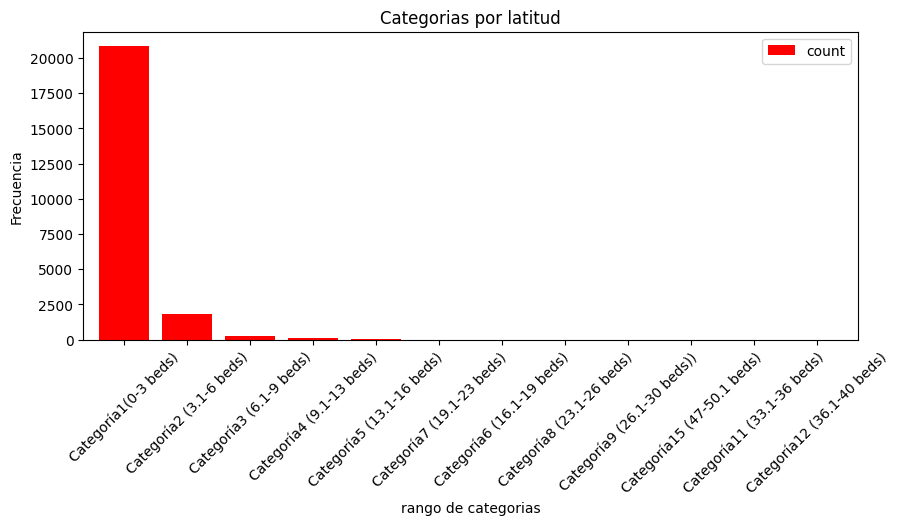

In [20]:
#Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot(kind = 'bar', width=0.8, figsize=(10,4), color= "red", rot=45)
plt.title('Categorias por latitud')
plt.xlabel('rango de categorias')
plt.ylabel('Frecuencia')